# **Лабораторная работа №8**

## **Задача 8.1.28**

Найти аналитическое и приближенное решения краевой задачи
                            
$$
\begin{cases}
    -u'' - u' + 0 = x^2 - 2x + 3, \quad x \in (2,4);\\
    u(2) = -1, \quad u(4) = -6;    
\end{cases}
$$
с заданным шагом $h$. Решение системы разностных уравнений найти c помощью метода прогонки.

#### **1. Найти аналитическое решение задачи.**
$$
\begin{cases}
    -u'' - u' + 0 = x^2 - 2x + 3, \quad x \in (2,4);\\
    u(2) = -1, \quad u(4) = -6;    
\end{cases}
$$

Найдём решение однородного уравнения $ -u'' - u' = 0$:

Характеристическое уравнение: $-\lambda^2 - \lambda = 0$

Решения: $\lambda_1 = 0,\quad \lambda_2 = -1$, кратность обоих - 1, поэтому
$$
u_{одн} = c_1e^{-x} + c_2
$$

Найдём частное решение. Так как правая часть имеет вид квадратного уравнения, а в левой минимальная степень производной - 1, то оно имеет вид $Ax^3 + Bx^2 + Cx$

Подставим его в уравнение:
$$
-3Ax^2 -2Bx - C - 6Ax - 2B = x^2 - 2x + 3 \\
\begin{cases}
-3A = 1 \\
-2B - 6A = -2 \\
-C - 2B = 3
\end{cases}
$$

Решение:
$$
\begin{cases}
A = -\frac{1}{3}\\
B = 2\\
C = -7
\end{cases}
$$

Значит, решение д.у.:
$ u = c_1e^{-x} + c_2 -\frac{1}{3}x^3 + 2x^2 - 7x $

Найдём теперь решение краевой задачи:
$$
\begin{cases}
    u(2) = -1\\
    u(4) = -6
\end{cases} \Leftrightarrow
\begin{cases}
    C_1\cdot e^{-2} + C_2 - \frac{1}{3}\cdot 8 + 2\cdot 4 - 7\cdot 2 = -1\\
    C_1\cdot e^{-4} + C_2 - \frac{1}{3}\cdot 64 + 2\cdot 16 - 7\cdot 4 = -6
\end{cases} \Leftrightarrow
\begin{cases}
    C_1 \approx -31.334\\
    C_2 \approx 11.907
\end{cases}
$$

Таким образом, решение задачи следующее:
$
u = -31.334\cdot e^{-x} + 11.907 -\frac{1}{3}x^3 + 2x^2 - 7x 
$

График решения:


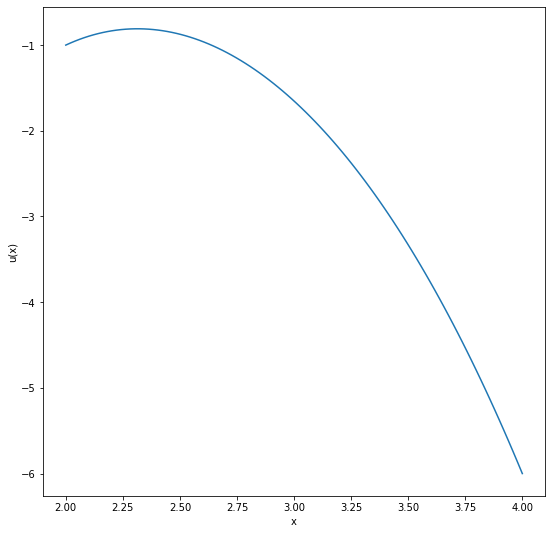

In [1]:
import matplotlib.pyplot as plt
import numpy as np


print("График решения:")
plt.figure(figsize=(9,9))
x = np.linspace(2, 4, 100)
y = -31.334*np.exp(-x) + 11.907 - 1/3*x**3 + 2*x**2 - 7*x
plt.xlabel("x") 
plt.ylabel("u(x)") 
plt.plot(x, y)

#### **2. Cоставить разностную схему и выписать коэффициенты матрицы системы уравнений и коэффициенты правой части.**

Чтобы составить разностную схему, воспользуемся аппроксимизациями:
$$
    u''(x) \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} \quad
    u'(x) \approx \frac{u_{i+1} - u_{i-1}}{2h}
$$
Подставляем в исходное уравнение:
$$
-\frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} - \frac{u_{i+1} - u_{i-1}}{2h} = x^2 - 2x + 3
$$

Немного преобразуем...
$$
    -2u_{i-1} + 4 u_i - 2u_{i+1} - hu_{i+1} + hu_{i-1} = 2h^2 x^2 - 4h^2x + 6h^2\\
    (h - 2)u_{i-1} + 4 u_i - (h+2)u_{i+1} = 2h^2 x^2 - 4h^2x + 6h^2
$$

Получаем систему:
$$
\begin{cases}
    u_0 = -1\\
    \dots\\
    (h - 2)u_{i-1} + 4 u_i - (h+2)u_{i+1} = 2h^2 (x_i^2 - 2x_i + 3)\\
    \dots\\
    u_N = -6
\end{cases}
$$

Матрица выглядит следующим образом:
$$
\begin{pmatrix}
    1 & 0 & 0 & 0 & \cdots & 0 & 0  \\
    h-2 & 4 & -h-2 & 0 & \cdots & 0 & 0  \\
    0 & h-2 & 4 & -h-2 & \cdots & 0 & 0  \\
    \vdots & \vdots & \ddots & \ddots & \ddots & \vdots & \vdots \\
    0 & 0 &   \cdots & h-2 & 4 & -h-2 & 0 \\
    0 & 0 &   \cdots & 0 &h-2 & 4 & -h-2 \\
    0 & 0 &   \cdots & 0 & 0 & 0 & 1
\end{pmatrix} 
$$

Но необходимо учесть, что $h < 2\cdot max \frac{|k'_i|}{k_i}$.

То есть в нашем случае $h < 2$

#### **3. Найти решение задачи по разностной схеме с точностью 0.001.**

Реализуем метод прогонки. В нашем случае
$$
    a_i = h-2, \quad b_i = 4, \quad c_i = h+2, \quad d_i = 2h^2f_i, \quad 1 \leq i \leq N-1 \\
    b_0 = 1, \quad c_0 = 0 \\
    a_N = 0, \quad b_N = 1
$$

In [2]:
def analiticalAns(x):
    return -31.334 * np.exp(-x) + 11.907 - 1 / 3 * x ** 3 + 2 * x ** 2 - 7 * x


def f(x):
    return x ** 2 - 2 * x + 3


def getCoefs(a, b, c, d, N):
    alpha = []
    beta = []
    alpha.append(-c[0] / b[0])
    beta.append(d[0] / b[0])

    for i in range(1, N):
        gamma = b[i] + a[i] * alpha[i - 1]
        alpha.append(-c[i] / gamma)
        beta.append((d[i] - a[i] * beta[i - 1]) / gamma)

    gamma = b[N] + a[N] * alpha[N - 1]
    beta.append((d[N] - a[N] * beta[N - 1]) / gamma)
    return (alpha, beta)


def getUVec(tpl: tuple, u0, uN):
    alpha = tpl[0]
    beta = tpl[1]
    N = len(alpha)
    U = [0 for i in range(N + 1)]
    U[N] = uN

    for i in range(N - 1, 0, -1):
        U[i] = alpha[i] * U[i + 1] + beta[i]

    U[0] = u0
    return U


def getAnyX(x, UDots, h, a, b):
    left = right = 0
    left = a
    right = a + h
    i = 0
    while right < x:
        left = right
        right += h
        i += 1
        if left > b:
            break
    if i + 1 > len(UDots) - 1:
        i = len(UDots) - 2
        right = b
        left = b - h
    y1 = UDots[i + 1]
    y0 = UDots[i]
    x0 = left
    x1 = right
    return (y1 - y0) / h * x + (y0 * x1 - y1 * x0) / h

In [3]:
A = 2
B = 4
Ua = -1
Ub = -6
eps = 1e-3
N = 2

def getEps(A, B, Ua, Ub, N):
    h = (B-A)/N
    x = np.linspace(A, B, N+1)
    a = [h - 2 for _ in range(N+1)]
    b = [4 for _ in range(N+1)]
    c = [-h - 2 for _ in range(N+1)]
    d = [2*h**2*f(x[i]) for i in range(N+1)]
    
    d[0] = Ua
    d[N] = Ub
    b[0] = 1
    c[0] = 0
    a[N] = 0
    b[N] = 1

    udots = getUVec(getCoefs(a,b,c,d,N), Ua, Ub)
    deltas = []
    for xi in x:
        delta = analiticalAns(xi) - getAnyX(xi, udots, h, A, B)
        deltas.append(abs(delta))

    return max(deltas)

delta = getEps(A, B, Ua, Ub, N)
while delta > eps:
    N += 1
    delta = getEps(A, B, Ua, Ub, N)
    print("{:2} {:.4f}".format(N, (B-A)/N), end=" => ")
    print(delta)

 3 0.6667 => 0.03844751469338248
 4 0.5000 => 0.02344258799664445
 5 0.4000 => 0.014519045884677118
 6 0.3333 => 0.010235690802819164
 7 0.2857 => 0.007386887951064125
 8 0.2500 => 0.005641939506944027
 9 0.2222 => 0.004392941203987366
10 0.2000 => 0.003520659461486275
11 0.1818 => 0.002865941557900875
12 0.1667 => 0.0023696712064662506
13 0.1538 => 0.001984664022637972
14 0.1429 => 0.0016761068766157905
15 0.1333 => 0.001430785093758935
16 0.1250 => 0.0012261359679932582
17 0.1176 => 0.0010602802686108248
18 0.1111 => 0.0009177187461357761


#### **4. Построить на одном чертеже графики приближенного и аналитического решений, и график погрешности.**

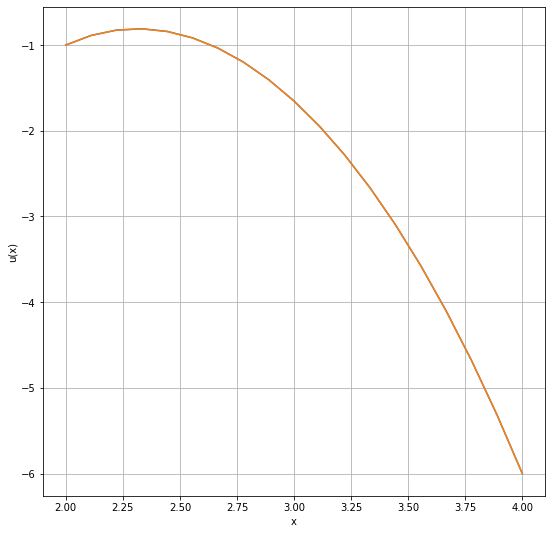

In [4]:
plt.figure(figsize=(9,9))
h = (B-A)/N
x = np.linspace(A, B, N+1)
a = [h - 2 for _ in range(N+1)]
b = [4 for _ in range(N+1)]
c = [-h - 2 for _ in range(N+1)]
d = [2*h**2*f(x[i]) for i in range(N+1)]

d[0] = Ua
d[N] = Ub
b[0] = 1
c[0] = 0
a[N] = 0
b[N] = 1

y1 = -31.334*np.exp(-x) + 11.907 - 1/3*x**3 + 2*x**2 - 7*x

y2 = [getAnyX(xi, getUVec(getCoefs(a, b, c, d, N), Ua, Ub), h, A, B) for xi in x]
plt.xlabel("x") 
plt.ylabel("u(x)") 
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
# for el in getUVec(getCoefs(a, b, c, d, N), Ua, Ub):
#     print(el)

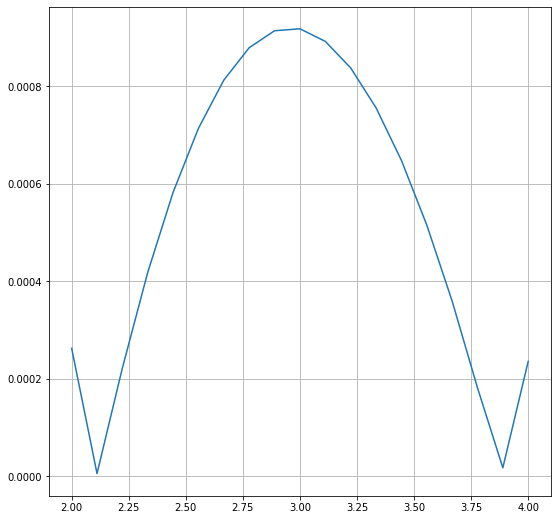

In [5]:
plt.figure(figsize=(9,9))
plt.plot(x, np.abs(y2-y1))
plt.grid()

## **Задача 8.2.28**

Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами
теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка $x_0 = 2.2$ стержня имела максимальную температуру?
Математически задача формулируется следующим образом: найти приближенное решение краевой задачи
$$
\begin{cases}
    -(k(x)u')' + 0 = x^2 - 2x + 3, \quad x \in (0, 3);\\
    u(0) = 5, \quad u(3) = 1
\end{cases}, \quad k(x) = 
\begin{cases}
    6 - x, \quad 0 \leq x \leq 1\\
    \sqrt{x + 3}, \quad 1 \leq x \leq 2\\
    16, \quad 2 \leq x \leq 3
\end{cases}
$$
при каждой конфигурации стержня.

#### **1. Составить подпрограмму, вычисляющую функцию $k(x)$ из индивидуального варианта.**

In [6]:
def k1(x):
    return 6-x


def k2(x):
    return np.sqrt(x+3)


def k3(x):
    return 16


def k(x, prstn):
    if x < 0 or x > 3:
        return 0
    elif x <= 1:
        return prstn[0](x)
    elif x <= 2:
        return prstn[1](x)
    else:
        return prstn[2](x)

#### **2. Для каждого варианта конфигурации стержня произвести расчет по разностной схеме с шагом $h = \frac{b-a}{100}$**

Воспользуемся полученной в учебнике разностной схемой (п. 15.3, случай переменного коэффициента k(x):
$$
L^h[u^h](x_i) = -\frac{1}{h}\Big[k_{i + 1/2}\frac{u_{i+1}-u_i}{h} - k_{i-1/2}\frac{u_i-u_{i-1}}{h}\Big] + q_iu_i
$$
т.е.
$$
-\frac{1}{h}\Big[k_{i + 1/2}\frac{u_{i+1}-u_i}{h} - k_{i-1/2}\frac{u_i-u_{i-1}}{h}\Big] + q_iu_i = f_i
$$
Преобразуем:
$$
-\Big[k_{i + 1/2}\big(u_{i+1}-u_i\big) - k_{i-1/2}\big(u_i-u_{i-1}\big)\Big] + q_iu_ih^2 = h^2f_i
$$

Имеем:
$$
-k_{i-1/2}\cdot u_{i-1} + (k_{i+1/2} + k_{i-1/2} + q_ih^2)\cdot u_i - k_{i+1/2}\cdot u_{i+1} = h^2f_i
$$
т.о.:
$$
    a_i = -k_{i-1/2} \quad b_i = k_{i+1/2} + k_{i-1/2} + q_ih^2, \quad c_i = - k_{i+1/2}, \quad d_i = h^2f_i, \quad 1 \leq i \leq N-1 \\
    b_0 = 5, \quad c_0 = 0, \quad d_0 = 5 \\
    a_N = 0, \quad b_N = 1, \quad d_N = 1
$$

#### **3. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня.**

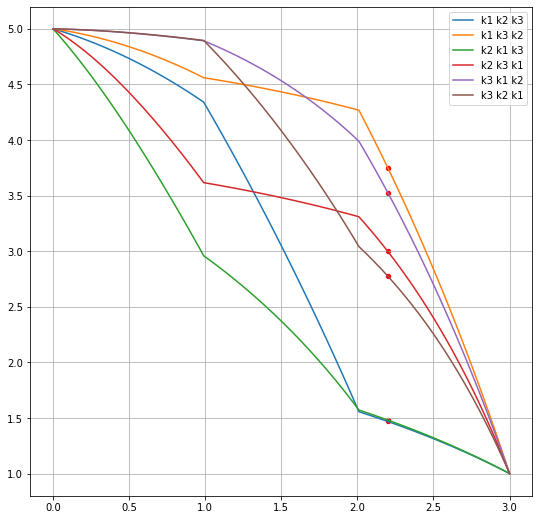

In [11]:
A = 0
B = 3
Ua = 5
Ub = 1
N = 100
x0 = 2.2
h = (B-A)/N

def GetUdots(A, B, Ua, Ub, N, prstn):
    h = (B-A)/N
    x = np.linspace(A, B, N+1)
    a = [-k(x[i]-h/2, prstn) for i in range(N+1)]
    b = [k(x[i]+h/2, prstn) + k(x[i]-h/2, prstn) for i in range(N+1)]
    c = [-k(x[i]+h/2, prstn) for i in range(N+1)]
    d = [h**2*f(x[i]) for i in range(N+1)]
    
    d[0] = Ua
    d[N] = Ub
    b[0] = 1
    c[0] = 0
    a[N] = 0
    b[N] = 1
    
    return getUVec(getCoefs(a,b,c,d,N), Ua, Ub)
    
plt.figure(figsize=(9,9))
funcs = [k1, k2, k3]
prstn = [k1, k2, k3]
for i in range(3):
    prstn[0] = funcs[i]
    for j in range(3):
        if j == i:
            continue
        prstn[1] = funcs[j]
        for l in range(3):
            if l == i or l == j:
                continue
            x = np.linspace(A,B,N+1)
            prstn[2] = funcs[l]
            udots = GetUdots(A, B, Ua, Ub, N, prstn)
            y = [getAnyX(xi, udots, h, A, B) for xi in x]
            plt.plot(x,y, label="k{} k{} k{}".format(i+1, j+1, l+1))
            plt.scatter(x0, getAnyX(x0, udots, h, A, B), color='red', s=19, marker='o')
plt.legend()
plt.grid()

Отметим красными точками положение на графике точек в $x_0 = 2.2$. Как видим, самая удачная конфигурация - $$ k = 
\begin{cases}
    6 - x, \quad 0 \leq x \leq 1\\
    16, \quad 1 \leq x \leq 2\\
    \sqrt{x + 3}, \quad 2 \leq x \leq 3
\end{cases}
$$